In [1]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


# Importing required packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
import feature_engine.transformation as vt
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_set = pd.read_csv('winequality-red.csv')
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking the shape and info of the dataset, and getting unique values

In [4]:
data_set.shape

(1599, 12)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data_set.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
data_set.quality.value_counts(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# Function to create a histogram, and a boxplot and scatter plot.
def diagnostic_plots(data_set, variable,target):
# Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(data_set[variable], bins=30,color = 'r')
    plt.title('Histogram')

    # scatter plot
    plt.subplot(1, 4, 2)
    plt.scatter(data_set[variable],data_set[target],color = 'g')
    plt.title('Scatterplot')
    
    # box plot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=data_set[variable],color = 'b')
    plt.title('Boxplot')
    
    # barp lot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = data_set)   
    plt.title('Barplot')
    
    plt.show()

# Explore data

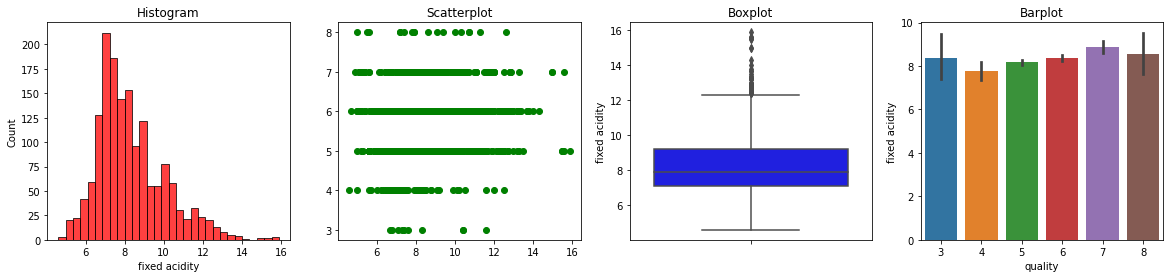

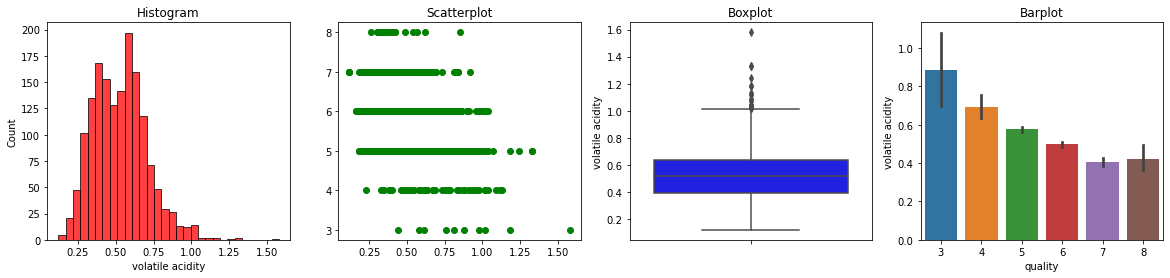

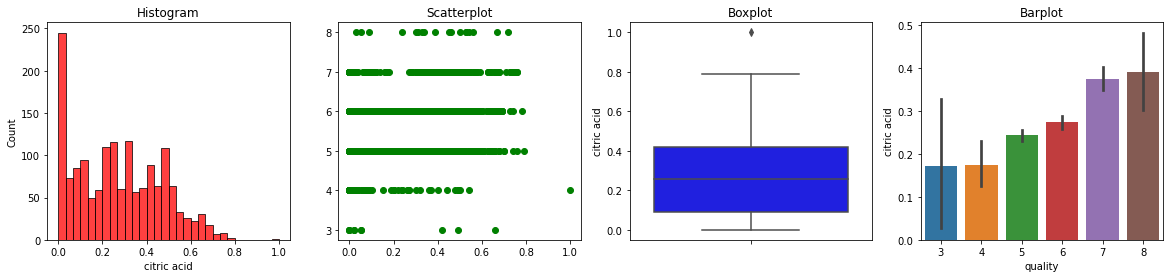

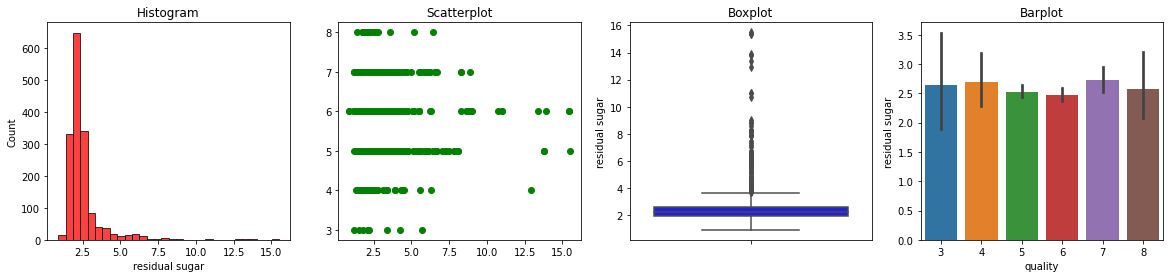

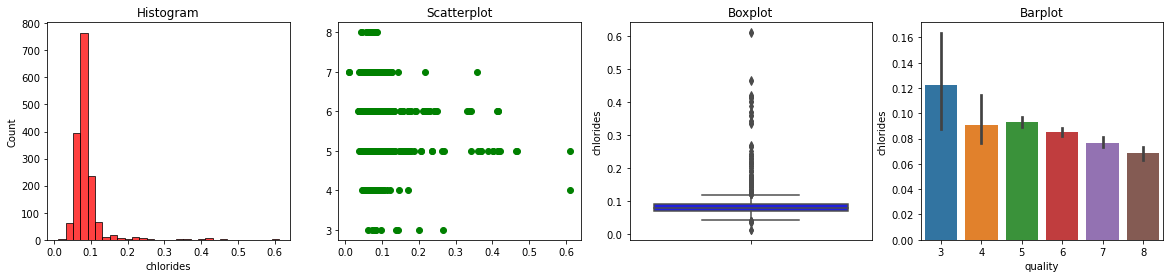

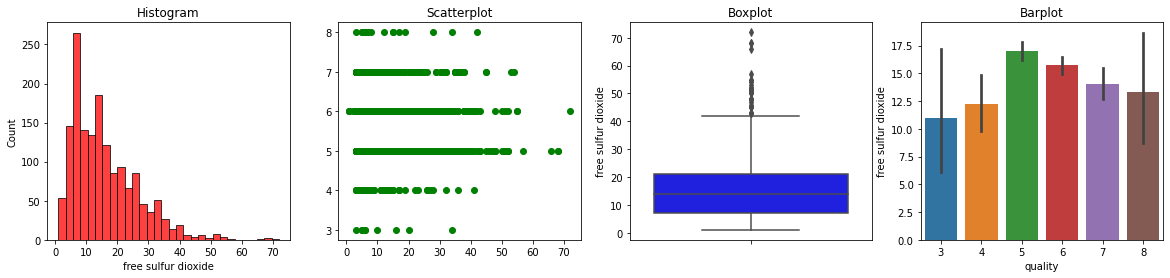

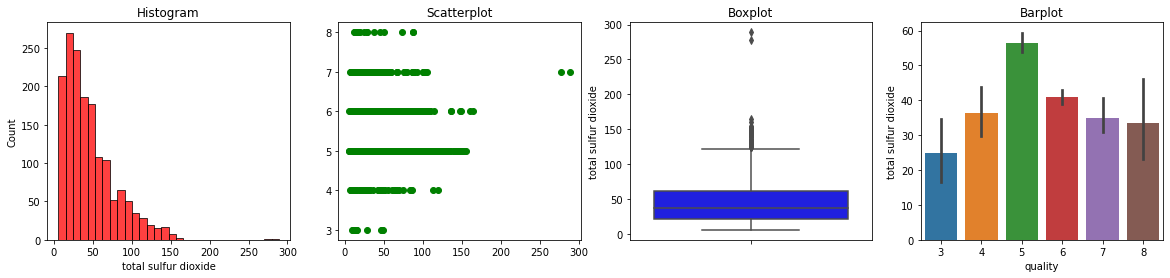

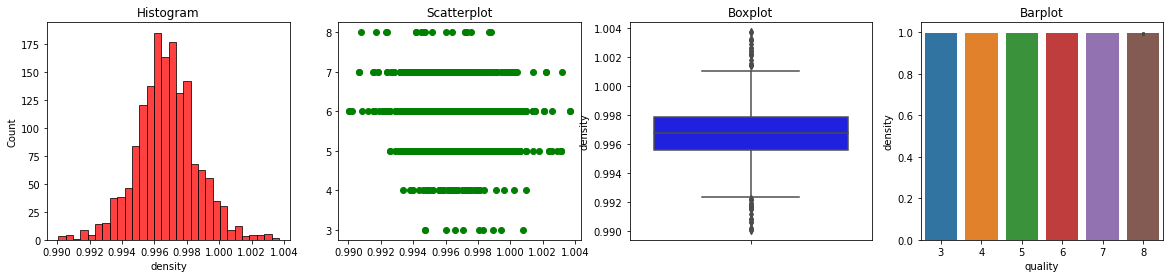

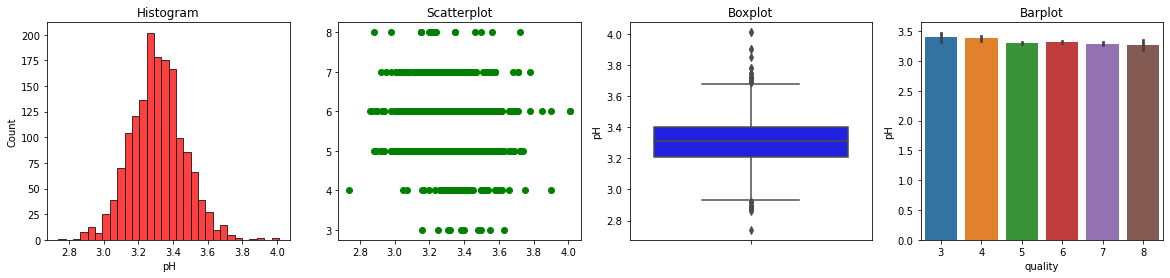

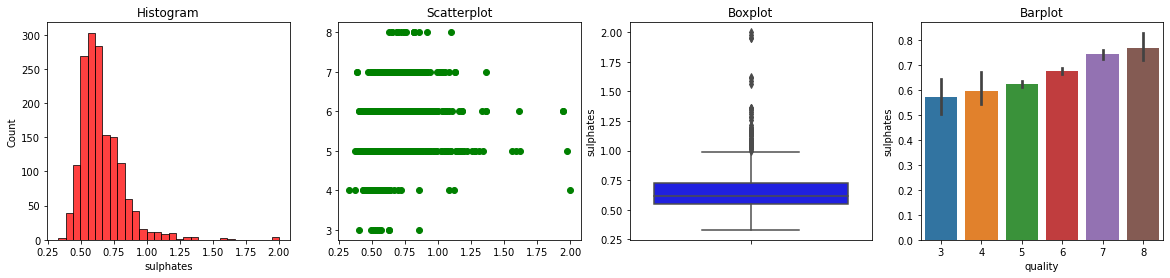

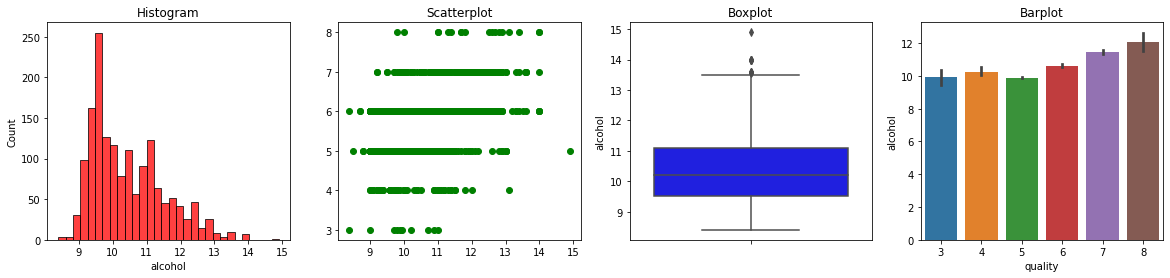

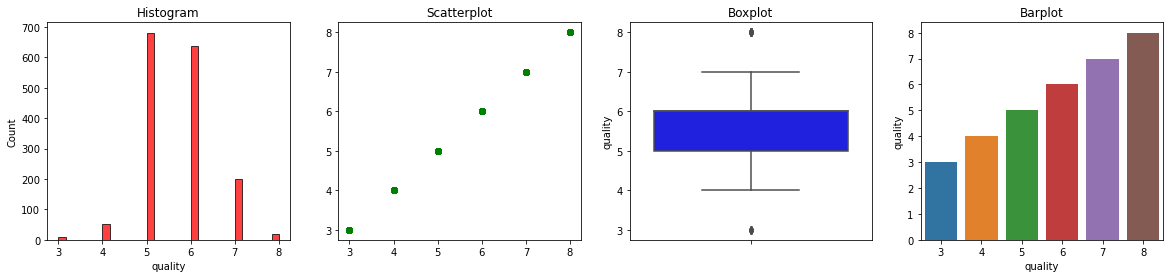

In [9]:
for variable in data_set:
    diagnostic_plots(data_set,variable,'quality')

# heatmap to visualize the correlation between each feature and the target variable

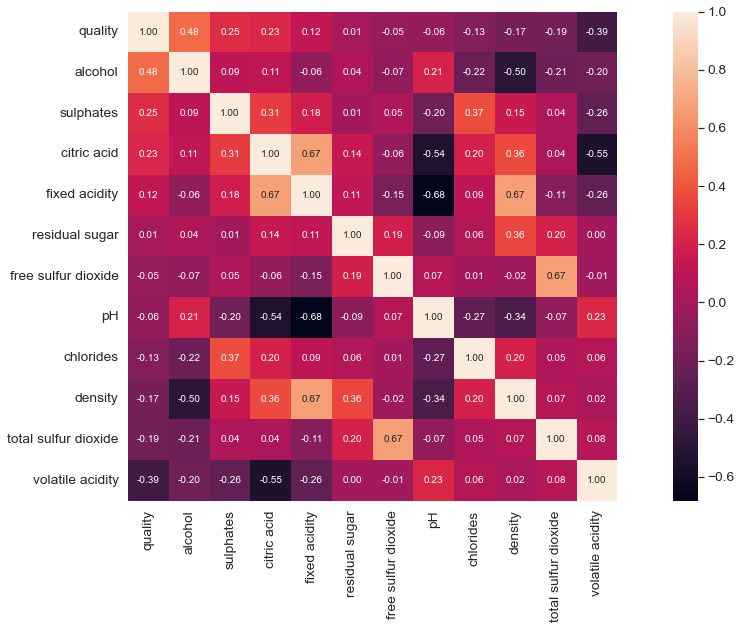

In [10]:
corr = data_set.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,linecolor='red')
plt.show()

# Check for missing values

In [11]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Detect outliers using the IQR method

In [12]:
def detect_outliers(data_set,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data_set[c],25)
        # 3rd quartile
        Q3 = np.percentile(data_set[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data_set[(data_set[c] < Q1 - outlier_step) | (data_set[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

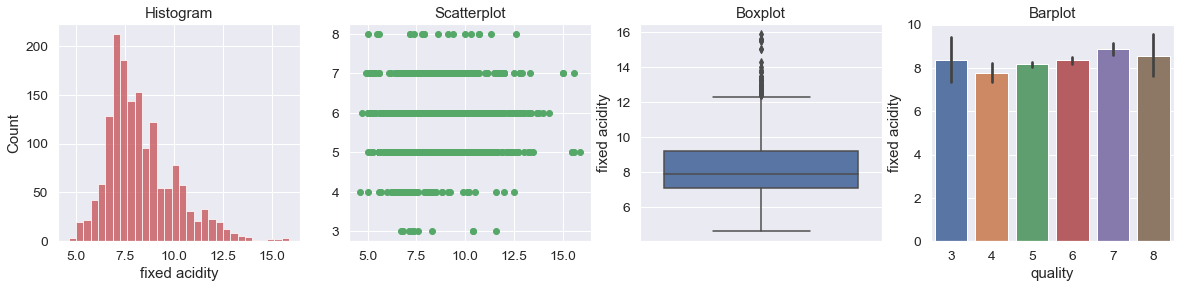

In [13]:
# Identify outliers for the fixed acidity feature
diagnostic_plots(data_set,'fixed acidity','quality')

In [14]:
data_set.shape

(1599, 12)

In [15]:
data_set.iloc[detect_outliers(data_set,data_set.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


In [16]:
data_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
# Using the defined function to detect outliers in the dataset and removing them using the Winsorizing method.
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                     'pH', 'sulphates'])

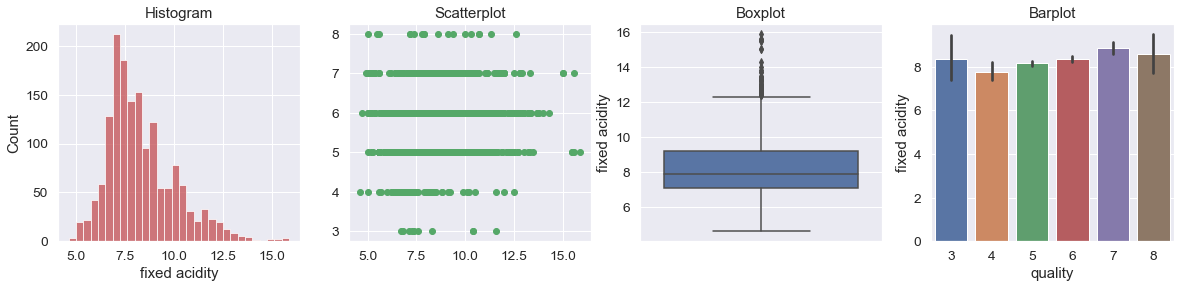

In [18]:
diagnostic_plots(data_set,'fixed acidity','quality')

In [19]:
windsoriser.fit(data_set)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['fixed acidity', 'volatile acidity', 'citric acid',
                      'residual sugar', 'chlorides', 'free sulfur dioxide',
                      'total sulfur dioxide', 'density', 'pH', 'sulphates'])

In [20]:
data_set = windsoriser.transform(data_set)

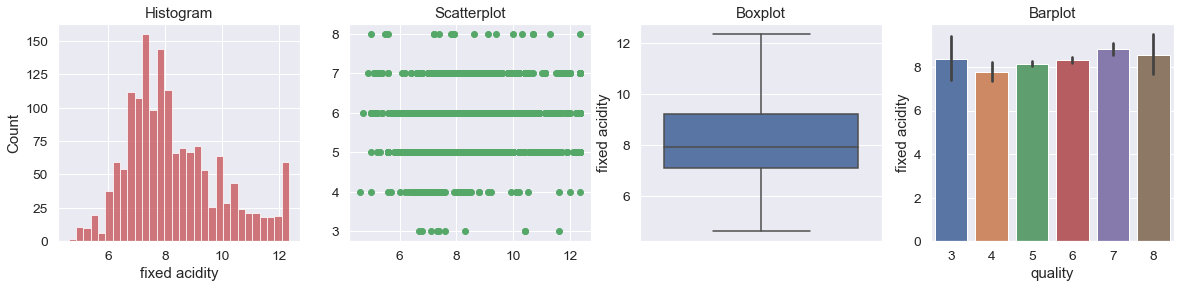

In [21]:
diagnostic_plots(data_set,'fixed acidity','quality')

In [22]:
#except pH
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

In [23]:
lt = vt.LogTransformer(variables = cols)

lt.fit(data_set)

LogTransformer(variables=['fixed acidity', 'volatile acidity', 'residual sugar',
                          'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'sulphates', 'alcohol'])

In [24]:
data_set = lt.transform(data_set)

### Converting the target variable into binary classification by dividing the wine as good and bad by giving the limit for the quality.

In [25]:
#Making binary classificaion for the response variable.Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data_set['quality'] = pd.cut(data_set['quality'], bins = bins, labels = group_names)

In [26]:
encoder = LabelEncoder()

In [27]:
data_set['quality'] = encoder.fit_transform(data_set['quality'])

In [28]:
data_set['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [29]:
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,0
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,0
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,0
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0


# separate into training and testing set

In [30]:
# separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_set.drop('quality', axis=1),
                                                    data_set['quality'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [31]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building a K-Nearest Neighbors Classifier mode

In [32]:
knn = KNeighborsClassifier()

In [33]:
# Define the list classifiers
classifiers = [
    ("KNN" , knn)
]

In [34]:
from sklearn.metrics import accuracy_score
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100

    # Evaluate clf's accuracy on the test set
    print('{:s} Test Accuracy : {:.3f} %'.format(clf_name, acc))

KNN Test Accuracy : 88.542 %
